In [2]:
!pip install numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


2 лаба зосереджена на використанні градієнтного спуску в оптимізації функції лінійної регресії. В першій частині лабораторної роботи потрібно буде оптимізувати лінійну регресію, працюючи тільки з однією змінною - intercept. В 2 частині добавиться 2 змінна - slope. В 3 частині лабораторної потрібно буде візуалізувати градієнтний спуск на 3д графіку.  

Перед початком виконання дуже рекомендую переглянути ці матеріали:
- https://www.youtube.com/watch?v=sDv4f4s2SB8 (обов'язково для перегляду)
- https://www.youtube.com/watch?v=IHZwWFHWa-w (3blue1brown - gradient descent)
- https://www.youtube.com/watch?v=7ArmBVF2dCs (statquest - що таке linear regression)

# Part One

В першій частині ми побудуєм пряму лінійної регресії на штучно-згенерованих даних. <br>
Це ми зробимо в декількох етапах:
1. згенеруєм штучні дані з шумом
2. візьмемо якесь фіксоване значення нахилу прямої (k) та рандомне (b)
3. будемо змінювати значення (b) щоб зменшити rss(residual sum of squares)
4. коли досягнемо прийнятної наближеності до найкращого значення - зупинимось
5. візуалізуємо дані

### Що таке лінійна регресія і як вона працює

Детальніше ви будете вчити це на курсі Probability and Statistics, але зараз витяжка головних пунктів:

- Якщо у нас є певний датасет (наприклад, масив значень {ціна ручки, час її служби}), його можна зобразити на 2D-площині, де вісь X відповідатиме за час служби, а вісь Y — за ціну.
- Візуалізувавши цей графік, можна побачити певну залежність: чим довший час служби, тим вища ціна. Щоб формалізувати цю залежність і мати змогу передбачити ймовірну ціну ручки (якщо ми знаємо лише її час служби), використовують лінійну регресію.
- Пряма лінійної регресії — це така лінія, яка найкраще відображає тренд у даних. Вона визначається шляхом мінімізації RSS (residual sum of squares) — залишкової суми квадратів.
- пряма регресії - це лінія, яка має найменший RSS(residual sum of squares)
- RSS — це сума квадратів відстаней між кожною реальною точкою даних і передбаченим значенням на прямій. Чим менший RSS, тим краще пряма описує залежність між змінними.

В чому полягає наше завдання і використання gradient descent (градієнтного спуску) - нам потрібно знайти лінію, яка найкраще відображає лінійну залежність.<br>
Для цього ми:

- візьмем загальну формулу прямої (y = kx + b), де k - нахил, b - підняття вгору
- запишемо формулу rss - sum((yi - (kxi+b)))
- для початку візьмемо якісь рандомні k та b
- знайдемо похідні по k по b від rss
- підставимо k та b в результат обчислення похідної - отримуєм градієнт в точці
- градієнт вказує напрямок найшвидшого зростання, а нам треба спадання, тому візьмемо протилежний до графієнту вектор (градієнт помножений на -1)
- тепер для кожної похідної (по k та по b) - будемо множити її на learning rate (0.001) і віднімати від теперішнього k або b відповідно
- повторюємо алгоритм певну кількість ітерацій (напр. 100)


### Реалізація

Для початку ми не будемо брати похідну по 2 змінним, а тільки по 1<br>
Тому ми зафіксуємо значення нахилу - k

*Завдання №1:*
1. Згенеруйте синтетичні дані для лінійної регресії.
2. Візуалізуйте дані, щоб переконатися, що вони мають лінійну залежність з доданим шумом

In [7]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/wd/0hl93z555kv94cdx628bl4z40000gn/T/ipykernel_14659/3406608158.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  X = np.random.random_integers(0, 10, SIZE)
/var/folders/wd/0hl93z555kv94cdx628bl4z40000gn/T/ipykernel_14659/3406608158.py:8: DeprecationWarning: This function is deprecated. Please call randint(-20, 20 + 1) instead
  Y = (1 - np.random.random_integers(-20, 20, SIZE) / 100) * (X * k + b)


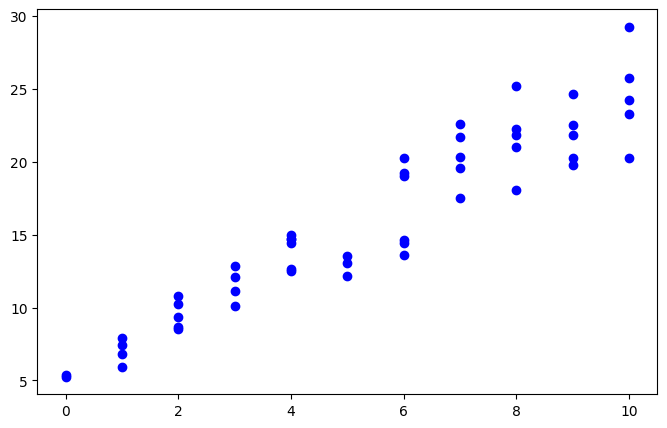

In [190]:
np.random.seed(42)

SIZE = 50

X = np.random.random_integers(0, 10, SIZE)
k, b = 2, 5

Y = (1 - np.random.random_integers(-20, 20, SIZE) / 100) * (X * k + b)

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue')
plt.show()

Тепер реалізуємо функцію, яка буде рахувати RSS.

*Завдання №2:*
1. Реалізуйте функцію для обчислення residual sum of squares (RSS).
2. Перевірте її на прикладі довільних значень y_true та y_pred.

In [176]:
def rss_calculation(true_val, k, X, b):
    return np.sum((true_val - (b + k * X)) ** 2)

print(f'RSS => {rss_calculation(Y, k, X, b)}')

RSS => 0


Тепер реалізуємо функцію, яка буде рахувати похідну від RSS по b

*Завдання №3:*
1. Реалізуйте функцію для обчислення похідної від RSS по intersept(b).
2. Перевірте її на прикладі довільних значень y_true та y_pred.

In [177]:
def rss_derivative(true_val, k, X, b):
    return np.sum(-2 * (true_val - (b + X * k)))

print(f'RSS derivative: {rss_derivative(Y, k+1, X, b)}')

RSS derivative: 542


Тепер найголовніше - функція, яка буде змінювати значення b допоки не буде досягнуто достатньої наближеності

*Завдання №4:*
1. Реалізуйте градієнтний спуск для оптимізації intercept.
2. Виведіть значення втрат та intercept на кожній десятій ітерації.
3. Збережіть історію втрат для подальшої візуалізації.

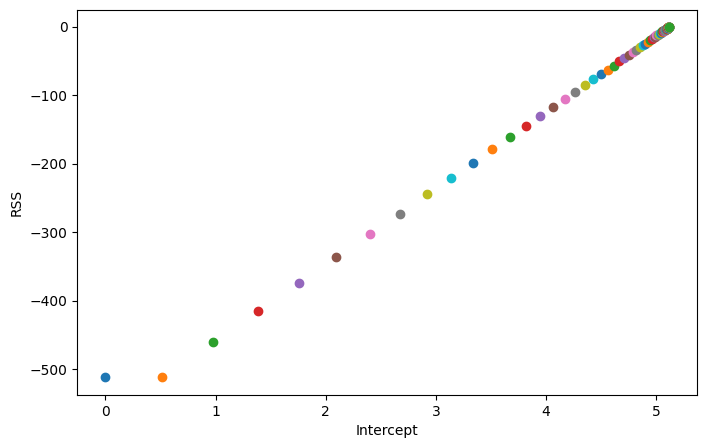

In [191]:
lr = 0.001
pred_b, i = 0, 0

plt.figure(figsize=(8, 5))
step = rss_derivative(Y, k, X, pred_b) * lr

loss = {}

while abs(step) > 0.0001:
    i += 1
    loss[i] = rss_calculation(Y, k, X, pred_b)
    plt.scatter(pred_b, step // lr)
    step = rss_derivative(Y, k, X, pred_b) * lr
    pred_b -= step

plt.xlabel('Intercept')
plt.ylabel('RSS')
plt.show()

Тепер потрібно побудувати 2 графіки - один залежність похибки від ітерації, інший - це лінія регресії з новим b та точки

*Завдання №5:*
1. Побудуйте графік зміни функції втрат під час навчання.
2. Проаналізуйте, чи збігається процес навчання до мінімуму.
3. Намалюйте графік лінійної регресії

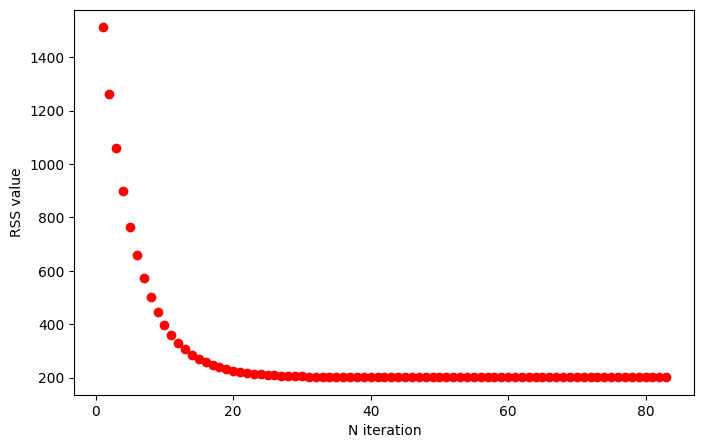

In [182]:
plt.figure(figsize=(8, 5))
for iteration, rss_value in loss.items():
    plt.scatter(iteration, rss_value, color='red')

plt.xlabel('N iteration')
plt.ylabel('RSS value')
plt.show()

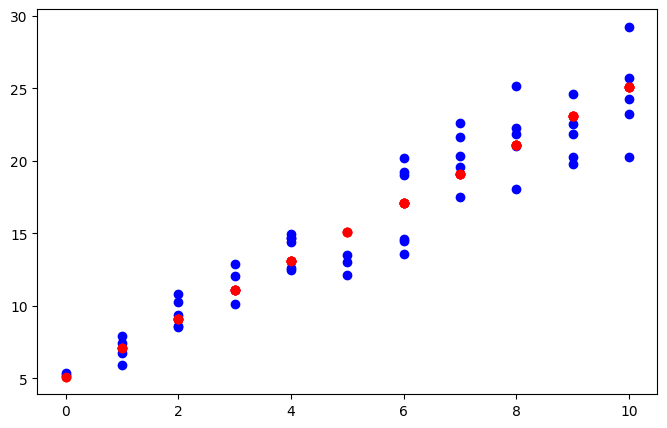

In [192]:
plt.figure(figsize=(8, 5))
for x, y in zip(X, Y):
    plt.scatter(x, y, color='blue')
    plt.scatter(x, x * k + pred_b, color='red')
plt.show()

# Part 2

В цій частині ми будемо оптимізовувати вже 2 змінні і відповідно брати похідну по 2 змінним.

Тому спочатку потрібно написати функцію, яка шукає градієнт - 2 похідних по k(slope) та по b(intercept)

*Завдання №1:*
- Реалізуйте функції для обчислення градієнтів функції втрат по intercept та slope.
- Перевірте їх на прикладі довільних значень y_true та y_pred.

In [186]:
def grad_intercept(true_val, slope, X, intercept):
    return -2 * np.sum((true_val - (intercept + slope * X)))

def grad_slope(true_val, slope, X, intercept):
    return np.sum(-2 * X * (true_val - (intercept + slope * X)))

print(f'Intercept gradient: {grad_intercept(Y, k+0.5, X, b+1)}')
print(f'Slope gradient: {grad_slope(Y, k, X, b+1)}')

Intercept gradient: 359.0799999999999
Slope gradient: 550.4


Тепер потрібно модифікувати функцію градієнтного спуску під 2 змінні

*Завдання №2:*
1. Реалізуйте градієнтний спуск для оптимізації intercept та slope.
2. Виведіть значення втрат та параметрів на кожній ітерації.
3. Збережіть історію втрат для подальшої візуалізації.

In [194]:
pred_b, pred_k, i = 0, 1, 0
step_b, step_k = grad_intercept(Y, pred_k, X, pred_b), grad_slope(Y, pred_k, X, pred_b)
lr = 0.0001

loss_k, loss_b = [], []

while abs(step_b) > 0.01 or abs(step_k) > 0.01:
    loss_k.append(step_k)
    loss_b.append(step_b)
    i += 1
    pred_b -= step_b * lr
    pred_k -= step_k * lr
    step_b, step_k = grad_intercept(Y, pred_k, X, pred_b), grad_slope(Y, pred_k, X, pred_b)

Знову малюємо графіки і порівнюємо результати

*Завдання №3:*
1. Намалюйте 2 графіки як в минулому завданні і порівняєте результати

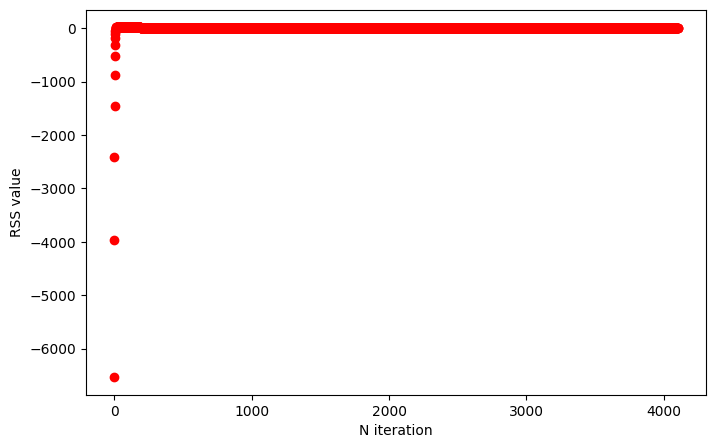

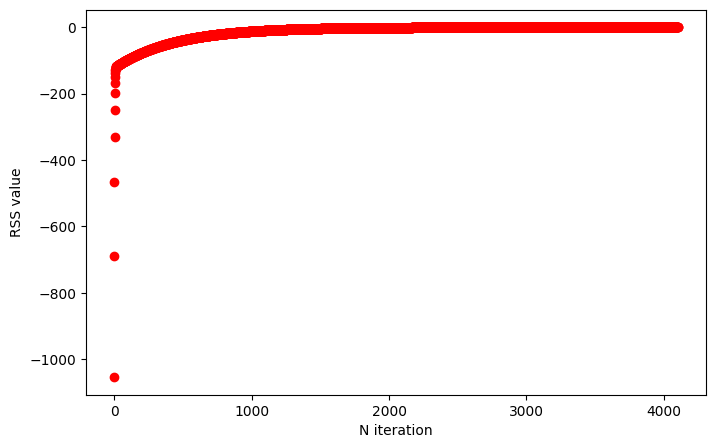

In [195]:
plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(loss_k)+1), loss_k, color='red')

plt.xlabel('N iteration')
plt.ylabel('RSS value')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(range(1, len(loss_b)+1), loss_b, color='red')

plt.xlabel('N iteration')
plt.ylabel('RSS value')
plt.show()

# Part 3

В цій частині ми побудуємо 3д графік градієнтного спуску. (Схожим чином як це показано у відео 3blue1brown)

Для початку імпортуємо необхідні бібліотеки

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from itertools import product

*Завдання №1:*
- Визначити функцію для обчислення середньоквадратичної помилки (MSE) для заданих значень intercept (зсув), slope (нахил), вхідних даних (X) та цільових значень (y).

In [197]:
def mse(intercept, slope, X, y):
    return (1 / len(y)) * np.sum((y - (slope * X + intercept)) ** 2)

*Завдання №2:*
- Створити сітку значень для intercept та slope, щоб оцінити функцію втрат для різних комбінацій параметрів. Це знадобиться для візуалізації поверхні втрат.

In [198]:
def create_grid(intercept_radius=20, slope_radius=10, amount=500):
    intercept_range, slope_range = np.linspace(-intercept_radius, intercept_radius, amount), np.linspace(-slope_radius, slope_radius, amount)
    grid = product(intercept_range, slope_range)

    return grid

grid = create_grid()

*Завдання №3:*
- Написати функцію для обчислення значення втрат (MSE) для кожної комбінації intercept та slope у сітці. Ці значення будуть використані для побудови 3D-графіка поверхні втрат.

In [199]:
def mse_loss(X, y):
    mse_info = {}
    for variables in create_grid():
        mse_info[variables] = mse(*variables, X, y)

    return mse_info

mse_history = mse_loss(X, Y)

Завдання №4:
- Переписати алгоритм градієнтного спуску для оптимізації intercept та slope
- Зберігати історію значень intercept, slope та втрат на кожній епосі для подальшої візуалізації.

In [200]:
best_combination_path = {'intercept': [], 'slope': [], 'mse': []}
best_combination = {'combination': None, 'loss': None}
history = {'intercept': [], 'slope': []}

for intercept, slope in grid:
    current_loss = rss_calculation(Y, slope, X, intercept)

    history['intercept'].append(intercept)
    history['slope'].append(slope)

    if best_combination['loss'] is None or abs(current_loss) < abs(best_combination['loss']):
        best_combination = {
            'combination': (intercept, slope), 'loss': current_loss
        }
        best_combination_path['intercept'].append(intercept)
        best_combination_path['slope'].append(slope)
        best_combination_path['mse'].append(mse_history[(intercept, slope)])

*Завдання №5:*
- Візуалізувати поверхню функції втрат та траєкторію градієнтного спуску в 3D.

/var/folders/wd/0hl93z555kv94cdx628bl4z40000gn/T/ipykernel_14659/1290440680.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


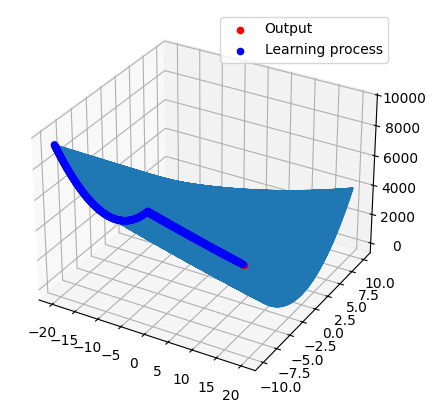

In [201]:
mse_list = list(mse_history.values())

figure = plt.figure(figsize=(10, 5))

plot = figure.add_subplot(111, projection='3d')
plot.plot(history['intercept'], history['slope'], mse_list)
plot.scatter(*best_combination['combination'], mse_history[best_combination['combination']], color='red', label='Output')
plot.scatter(best_combination_path['intercept'], best_combination_path['slope'], best_combination_path['mse'], color='blue', label='Learning process')

plot.legend()
figure.show()